<a href="https://colab.research.google.com/github/brdeleon/flagging_loans_shapley_values/blob/main/flagging_loans_shapley_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flagging Loans - Final Model with Shapley Values

This notebook goes uses Shapley values to interpret the final model's predictions.
The other notebooks in this repository go over EDA, data cleaning, preprocessing, and final model selection.

To plot a shapley value plot, you can follow these steps:

## Imports


### Install the necessary packages:
The 'shap' library is a Python package for interpreting the predictions of machine learning modesl using Shapley values. The 'shap'
Install the 'shap' package into your Python environment

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import the necessary libraries and modules:

In [ ]:
import warnings # Provides control over warning messages
warnings.filterwarnings("ignore") # Ignore warning messages

import joblib as jb # Package for saving and loading Python objects
from joblib import load  # Function to load saved trained model

import shap # Library for interpreting the predictions using Shapley values
import matplotlib.pyplot as plt # Used to display SHAP value plots

### Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Note that the df being imported has already been cleaned. For data cleaning process please see other notebooks in this repository.

In [ ]:
X_test, y_test = jb.load("/content/drive/MyDrive/flagging_loans/data/tests.pkl")

### Random Forest imblearn pipeline

Define the pipeline as an imblearn pipeline:

In [ ]:
final_model = f"/content/drive/MyDrive/flagging_loans/models/finalmodel.pkl"
final_pipeline = jb.load(final_model)

## **Shapley Values**
To plot SHAP (SHapley Additive exPlanations) values, we need to first create a TreeExplainer object for the random forest model in the pipeline. Then, we will use the TreeExplainer object to compute the SHAP values for a given set of input data.

## Global Interpretability
### Summary Plot
The shap.summary_plot() function plots the SHAP values for each feature in descending order of importance.

Create a SHAP explainer:

In [ ]:
# Extracts the inner classifier from the final_pipeline object
rf = final_pipeline.named_steps['classifier']
# Define the shap explainer for the random forest classifier of the final pipeline
explainer = shap.TreeExplainer(rf)

Generate SHAP values for the testing set:

In [ ]:
shap_values = explainer.shap_values(X_test)

Plot the SHAP values:

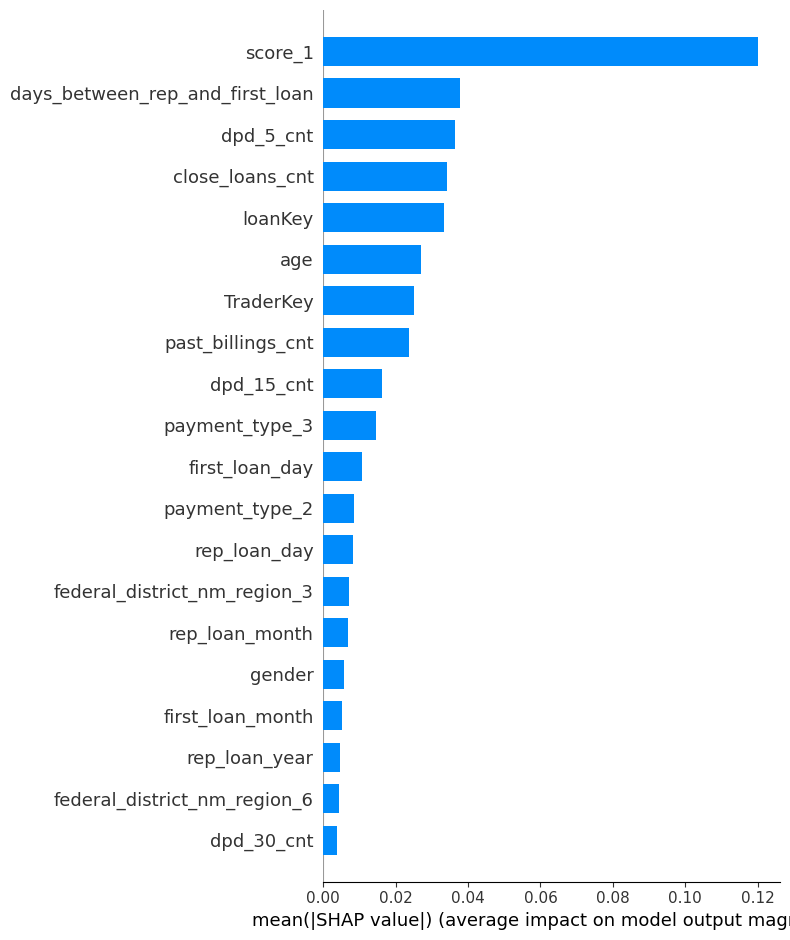

In [ ]:
# Specify shap values for the target class, X_test as our feature values, and bar plot type
shap.summary_plot(shap_values[1], X_test, plot_type='bar', show=False)
plt.show()

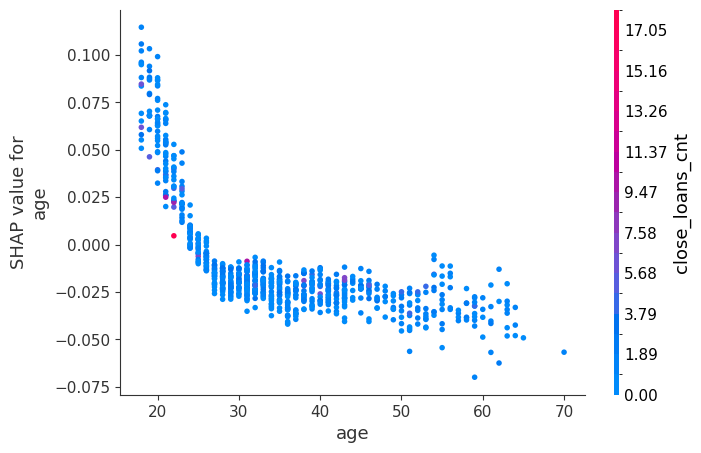

In [ ]:
# Plot the SHAP values for the "age" feature
shap.dependence_plot("age", shap_values[1], X_test)

## Local Interpretability
### Force Plot
A force plot shows how each feature is contributing to the prediction for that instance. The length and color of the bars represent the magnitude and direction of the feature's impact on the prediction.

By visually inspecting the force plot for multiple predictions, we can get a sense of whether the model is relying on any potentially discriminatory or biased features to make its predictions.

Create a Shap explainer using the TreeExplainer() function from the shap library, passing in the fitted pipeline.

In [ ]:
# Create a Shap explainer using the TreeExplainer() function
explainer = shap.TreeExplainer(final_pipeline.named_steps['classifier'])

Use the shap_values() function from the explainer to generate Shapley values for a subset of the testing data.

In [ ]:
# Generate Shapley values for a subset of the testing data
sampled_X_test = X_test.sample(100)
shap_values = explainer.shap_values(sampled_X_test)

Note that the expected_value argument passed to shap.force_plot() is set to 1 because we are interested in the positive class.

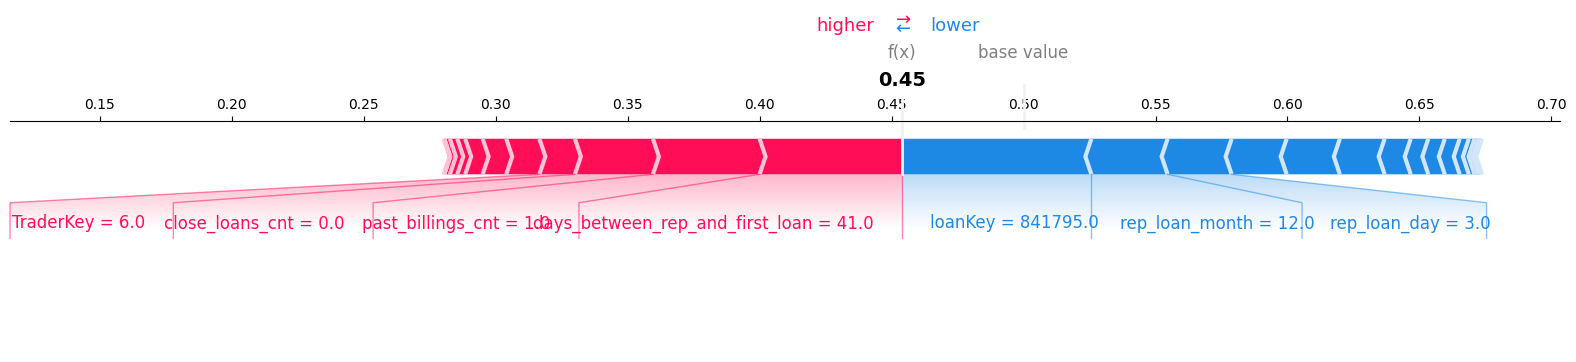

In [ ]:
# Visualize the Shapley values for a specific instance of the testing data using force_plot()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], sampled_X_test.iloc[0,:], matplotlib=True, show=False)

# Display the plot
plt.show()

## Waterfall Plot
 We are using the shap.waterfall_plot() function to generate a waterfall plot for the first instance in X_test. We pass the SHAP values for the target class (shap_values[1][0]) and the feature values for the first instance in X_test (X_test.iloc[0,:]) as arguments to the function. We then use plt.title() to set the title of the plot and finally use plt.show() to display the plot.

In [ ]:
rf = final_pipeline.named_steps['classifier']
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [ ]:
# Wrap shap_values in a shap.Explanation object
shap_explanation = shap.Explanation(
    values=shap_values[1][0],
    base_values=explainer.expected_value[1],
    data=X_test.iloc[0,:]
)

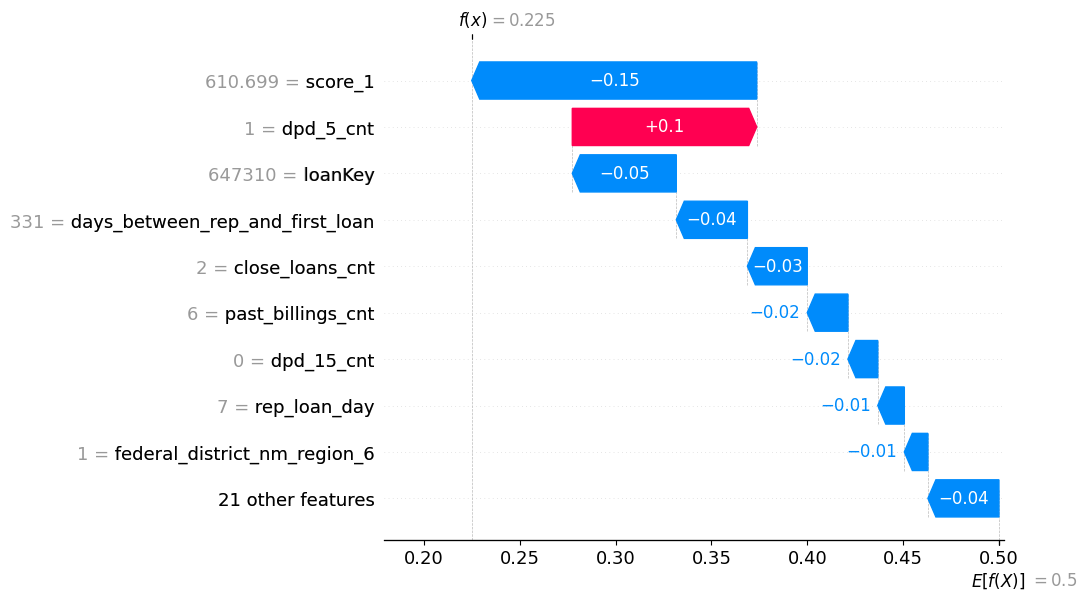

In [ ]:
# Generate a waterfall pot using shap_expalnation object
shap.plots.waterfall(shap_explanation, max_display=10)